In [452]:
import pandas as pd
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [453]:
df.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S


In [454]:
df.shape

(891, 12)

前処理について記述せよ

１、外れ値があるか確認
２、欠損値があるか確認
３、数値になっているか確認


In [455]:
#前処理１
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(df)
data_test = transform_features(df_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [456]:
data_train.shape

(891, 11)

In [457]:
#前処理２
from sklearn import preprocessing#下記カラムの部分のtrainとtestをつなげて数値に変換
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()#データを、数値(ラベル)で表現するメソッド。
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

encode_features(data_train,data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


モデル選択の基準
１、トレーニング時間。
２、精度。
３、パラメータの数。

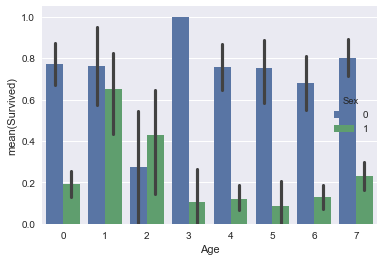

In [458]:
#モデル選択におけるデータ可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x="Age",y="Survived",hue='Sex',data=data_train)

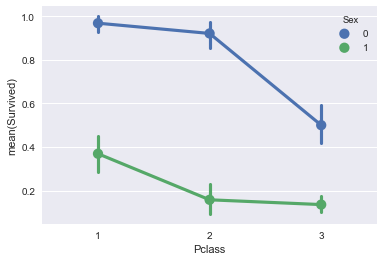

In [459]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train)

データ可視化の結果について考察せよ
上記の２つの可視化から分かったことについて考察せよ。
A.
・生存率はTeenagerは男性の方が高いが、それ以外は女性の方が高いこと。
・Teenagerの生存率が他の年齢層と比較し低いこと。
・Studentの女性の生存率が１００％であること。
・クラスの高い乗客の方が生存率が高いこと。
・クラス関係なく女性の方が生存率が高いこと。

上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか
A.
・はじめに"Survived"との相関係数を出し、その値が高い特徴量を使用し、上記のモデルを全部試す。

In [460]:
#データセットの分割
from sklearn.model_selection import train_test_split

X = data_train.drop(['Survived','PassengerId'],axis=1)
y = data_train['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ランダムフォレストについて記述せよ
決定木とはどのような手法か
A.上から１つの説明変数とその閾値によってデータを２つに分け、さらに枝先で同様に別基準でデータを分けることによって、分類するモデル。

ランダムフォレストとはどのような手法か
A.複数の決定木の非終端ノードの特徴を決められた数だけランダムに選択し、そこからの結果の多数決を学習結果とする。

ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。
A
長所
①過学習を抑える。
②データの正規化、標準化を考える必要がない。
③特徴量ごとの重要度を測ることができる。
短所
①説明変数のうち意味のある変数がノイズ変数より極端に低い場合にはうまく動かない。
②正解率は高いがその理由がわかりづらい。
③木の高さを大きくすると過学習しやすい

今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ
A.大量の学習サンプルがあり、どの特徴量が重要度が高いかわかるため、原因分析がしやすいためランダムフォレストの手法が適している。

In [461]:
#学習
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10,random_state=None)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [462]:
#Accuracyを求めよ,精度を高める
from sklearn.metrics import accuracy_score
predictions =clf.predict(X_test)#X_testを使って予測する
print(accuracy_score(y_test,predictions))

0.787709497207


ハイパーパラメータについて
ハイパーパラメーターとは何か
A.人の手で決定する必要のあるパラメータのこと。

ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ
A.
・n_estimators:作成する決定木の個数
・max_depth:決定木の深さの上限
・max_features:1〜特徴量の最大個数
・criterion:データを分ける際の基準

記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）
A.
・n_estimators:1以上。数を増やせばAccuracyは上がるがある一定以上あげてもAccuracyは変わらなくなる。
・max_depth:1以上。数を増やせばAccuracyは上がるがある一定以上あげてもAccuracyは変わらなくなる。
・max_features:整数、少数、"Auto","sqrt","log2",値を小さくすればAccuracyが下がる
・criterion:"gini","entropy",Accuracyは若干entropyの方が高いが誤差範囲。giniの方が学習時間が早い。

In [463]:
#チューニング
clf_1 = RandomForestClassifier(n_estimators=4)
clf_2 = RandomForestClassifier(n_estimators=6)
clf_3 = RandomForestClassifier(n_estimators=9)
clf_4 = RandomForestClassifier(max_features='log2')
clf_5 = RandomForestClassifier(max_features='sqrt')
clf_6 = RandomForestClassifier(max_features='auto')
clf_7 = RandomForestClassifier(criterion='entropy')
clf_8 = RandomForestClassifier(criterion='gini')
clf_9 = RandomForestClassifier(max_depth=2)
clf_10 = RandomForestClassifier(max_depth=3)
clf_11 = RandomForestClassifier(max_depth=5)
clf_12 = RandomForestClassifier(max_depth=10)
clf_13 = RandomForestClassifier(min_samples_split=2)
clf_14 = RandomForestClassifier(min_samples_split=3)
clf_15 = RandomForestClassifier(min_samples_split=5)
clf_16 = RandomForestClassifier(min_samples_leaf=1)
clf_17 = RandomForestClassifier(min_samples_leaf=5)
clf_18 = RandomForestClassifier(min_samples_leaf=8)

#学習
clf_1.fit(X_train,y_train)
clf_2.fit(X_train,y_train)
clf_3.fit(X_train,y_train)
clf_4.fit(X_train,y_train)
clf_5.fit(X_train,y_train)
clf_6.fit(X_train,y_train)
clf_7.fit(X_train,y_train)
clf_8.fit(X_train,y_train)
clf_9.fit(X_train,y_train)
clf_10.fit(X_train,y_train)
clf_11.fit(X_train,y_train)
clf_12.fit(X_train,y_train)
clf_13.fit(X_train,y_train)
clf_14.fit(X_train,y_train)
clf_15.fit(X_train,y_train)
clf_16.fit(X_train,y_train)
clf_17.fit(X_train,y_train)
clf_18.fit(X_train,y_train)

#予測
predictions_1 = clf_1.predict(X_test)
predictions_2 = clf_2.predict(X_test)
predictions_3 = clf_3.predict(X_test)
predictions_4 = clf_4.predict(X_test)
predictions_5 = clf_5.predict(X_test)
predictions_6 = clf_6.predict(X_test)
predictions_7 = clf_7.predict(X_test)
predictions_8 = clf_8.predict(X_test)
predictions_9 = clf_9.predict(X_test)
predictions_10 = clf_10.predict(X_test)
predictions_11 = clf_11.predict(X_test)
predictions_12 = clf_12.predict(X_test)
predictions_13 = clf_13.predict(X_test)
predictions_14 = clf_14.predict(X_test)
predictions_15 = clf_15.predict(X_test)
predictions_16 = clf_16.predict(X_test)
predictions_17 = clf_17.predict(X_test)
predictions_18 = clf_18.predict(X_test)

#Accuracy
print(accuracy_score(y_test,predictions_1))
print(accuracy_score(y_test,predictions_2))
print(accuracy_score(y_test,predictions_3))
print(accuracy_score(y_test,predictions_4))
print(accuracy_score(y_test,predictions_5))
print(accuracy_score(y_test,predictions_6))
print(accuracy_score(y_test,predictions_7))
print(accuracy_score(y_test,predictions_8))
print(accuracy_score(y_test,predictions_9))
print(accuracy_score(y_test,predictions_10))
print(accuracy_score(y_test,predictions_11))
print(accuracy_score(y_test,predictions_12))
print(accuracy_score(y_test,predictions_13))
print(accuracy_score(y_test,predictions_14))
print(accuracy_score(y_test,predictions_15))
print(accuracy_score(y_test,predictions_16))
print(accuracy_score(y_test,predictions_17))
print(accuracy_score(y_test,predictions_18))

0.731843575419
0.737430167598
0.782122905028
0.743016759777
0.776536312849
0.776536312849
0.787709497207
0.77094972067
0.698324022346
0.759776536313
0.798882681564
0.776536312849
0.776536312849
0.776536312849
0.798882681564
0.754189944134
0.793296089385
0.754189944134


検証は何か
A.汎用性のあるモデルになっているか確認すること。

なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)
A.トレーニングデータとテストデータの分け方によってAccuracyが変わってくるため。

主な検証方法について2つ以上記述せよ
A.
・ホールドアウト法ーデータセットをトレーニング用とテスト用に分割する
・K分割交差検証法ーデータセットをK個に分割しそのうち１つをテスト用、その他をトレーニング用データとする。学習、テストをK回繰り返し、それぞれの決定係数を平均化する。

K-分割交差検証について説明せよ
A.データセットをK個に分割しそのうち１つをテスト用、その他をトレーニング用データとする。学習、テストをK回繰り返し、それぞれの決定係数を平均化する。

K-分割交差検証はデータセットを何個に分割するか
A.K個。データセットによる。

データセットを分割する際、その個数はどのように考えると良いか
A.分割を増やせば決定係数は上がるが時間がかかり、分割を少なくすれば決定係数が下がるが時間は少なくて済む。

K-分割交差検証は何回の検証を行うか
A.データセットを分割した個数分。

K-分割交差検証の結果は、最終的にどのように求められるか
A.分割したそれぞれの精度を平均化して求められる。

In [464]:
#KFoldを実施する
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X,y,cv=10)
scores.mean()

0.81249233912155261

In [465]:
#どの特徴量が重要であったかを調査する
print(clf.feature_importances_)
#性別、苗字、接頭辞が重要

[ 0.1059901   0.23840319  0.07562776  0.04418206  0.03856125  0.06593955
  0.05649175  0.21085545  0.16394889]


In [466]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,3,1,4,1,0,0,7,100,19
1,1,0,0,1,0,3,2,182,20
2,3,0,7,0,0,0,7,329,16
3,1,0,7,1,0,3,2,267,20
4,3,1,7,0,0,1,7,15,19
5,3,1,6,0,0,1,7,538,19
6,1,1,0,0,0,3,4,500,19
7,3,1,1,3,1,2,7,608,13
8,3,0,7,0,2,1,7,382,20
9,2,0,5,1,0,2,7,559,20
